In [2]:
import pandas as pd
import numpy as np
import fsspec

import re
import nltk
from nltk.corpus import stopwords  
import textblob
import collections
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import CategoricalNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
import gensim
from gensim.models import word2vec

In [3]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/mahi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/mahi/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /Users/mahi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
ind_fl = pd.read_csv('../CrisisNLP_labeled_data_crowdflower/2014_India_floods/2014_India_floods_CF_labeled_data.tsv', sep='\t', engine='python')
ind_fl.head()

,tweet_id,tweet_text,label
0,'501222299685888000',RT @lilid426: Everyone has all these intense r...,not_related_or_irrelevant
1,'501203294409457664',@kkfred12 @StayDvpper oh yea I would like to t...,not_related_or_irrelevant
2,'501157833996767233',"RT @fruitpopniall: ""1D are about to split up"" ...",not_related_or_irrelevant
3,'501136832957259776',@Harry_Styles You are my ☀ You 💡 up my who...,not_related_or_irrelevant
4,'501049468511596544',"RT @abonetti420: Swinging blunts round, sun up...",not_related_or_irrelevant


In [6]:
pk_fl = pd.read_csv('../CrisisNLP_labeled_data_crowdflower/2014_Pakistan_floods/2014_Pakistan_floods_CF_labeled_data.tsv', sep='\t', engine='python')
pk_fl.head()

,tweet_id,tweet_text,label
0,'509390880315166720',RT @rehman_azhar: #Sialkot airport where Imran...,other_useful_information
1,'510365408440762368',Kashmir floods: Hyderpora mosque a symbol of c...,other_useful_information
2,'510662605422096384',Kashmir Floods: All Party Meeting in Srinagar ...,other_useful_information
3,'509274576275009536',#NewsUpdates Death Toll from India-Pakistan Fl...,injured_or_dead_people
4,'509392343129022464',RT @allaboutmqm: Video: Mian Ateeq visit KKF f...,infrastructure_and_utilities_damage


In [7]:
eq_df = pd.concat([ind_fl, pk_fl], ignore_index=True)
eq_df

,tweet_id,tweet_text,label
0,'501222299685888000',RT @lilid426: Everyone has all these intense r...,not_related_or_irrelevant
1,'501203294409457664',@kkfred12 @StayDvpper oh yea I would like to t...,not_related_or_irrelevant
2,'501157833996767233',"RT @fruitpopniall: ""1D are about to split up"" ...",not_related_or_irrelevant
3,'501136832957259776',@Harry_Styles You are my ☀ You 💡 up my who...,not_related_or_irrelevant
4,'501049468511596544',"RT @abonetti420: Swinging blunts round, sun up...",not_related_or_irrelevant
...,...,...,...
3584,'511637412385021952',RT @KlasraRauf: Pungovt claims CMSS took 9 hel...,donation_needs_or_offers_or_volunteering_services
3585,'511149310893772800',Pakistan Flood Sinks Boat Carrying Wedding Par...,injured_or_dead_people
3586,'511803295627636736',Jammu and Kashmir Floods: Yasin Malik Creates ...,other_useful_information
3587,'511047301947604992',RT @Joydas: Please use Kashmir Flood hashtag o...,donation_needs_or_offers_or_volunteering_services


In [8]:
eq_df['tweet_text']

0       RT @lilid426: Everyone has all these intense r...
1       @kkfred12 @StayDvpper oh yea I would like to t...
2       RT @fruitpopniall: "1D are about to split up" ...
3       @Harry_Styles   You are my ☀   You 💡 up my who...
4       RT @abonetti420: Swinging blunts round, sun up...
                              ...                        
3584    RT @KlasraRauf: Pungovt claims CMSS took 9 hel...
3585    Pakistan Flood Sinks Boat Carrying Wedding Par...
3586    Jammu and Kashmir Floods: Yasin Malik Creates ...
3587    RT @Joydas: Please use Kashmir Flood hashtag o...
3588    RT @Endtimesnews: Raging Floods Kill Over 440 ...
Name: tweet_text, Length: 3589, dtype: object

In [9]:
eq_df['tweet_text'] = eq_df['tweet_text'].str.replace(',', '')
del eq_df['tweet_id']

In [10]:
eq_df['tokenized_text'] = eq_df['tweet_text'].apply(nltk.word_tokenize)
stop_words = set(stopwords.words('english'))
new_final_words = []
for i in list(eq_df['tokenized_text']):
    new_words = []
    for j in i:
        if not j in stop_words:
            new_words.append(j)
    new_final_words.append(new_words)

eq_df['tokenized_text'] = new_final_words



In [11]:
eq_df['tokenized_text']

0       [RT, @, lilid426, :, Everyone, intense, relati...
1       [@, kkfred12, @, StayDvpper, oh, yea, I, would...
2       [RT, @, fruitpopniall, :, ``, 1D, split, '', #...
3       [@, Harry_Styles, You, ☀, You, 💡, whole, day, ...
4       [RT, @, abonetti420, :, Swinging, blunts, roun...
                              ...                        
3584    [RT, @, KlasraRauf, :, Pungovt, claims, CMSS, ...
3585    [Pakistan, Flood, Sinks, Boat, Carrying, Weddi...
3586    [Jammu, Kashmir, Floods, :, Yasin, Malik, Crea...
3587    [RT, @, Joydas, :, Please, use, Kashmir, Flood...
3588    [RT, @, Endtimesnews, :, Raging, Floods, Kill,...
Name: tokenized_text, Length: 3589, dtype: object

vectorizer = CountVectorizer()

tokenized_text = []
for i in range(0, len(list(eq_df['tokenized_text']))):
    vectorizer.fit_transform(eq_df['tweet_text'][i:i+1])
    tokenized_text.append(vectorizer.get_feature_names())

eq_df['tokenized_text'] = tokenized_text

In [12]:
eq_df['Subjectivity'] = pd.Series([textblob.TextBlob(x).sentiment.subjectivity for x in eq_df['tweet_text']])

In [13]:
eq_df

,tweet_text,label,tokenized_text,Subjectivity
0,RT @lilid426: Everyone has all these intense r...,not_related_or_irrelevant,"[RT, @, lilid426, :, Everyone, intense, relati...",1.000000
1,@kkfred12 @StayDvpper oh yea I would like to t...,not_related_or_irrelevant,"[@, kkfred12, @, StayDvpper, oh, yea, I, would...",0.000000
2,"RT @fruitpopniall: ""1D are about to split up"" ...",not_related_or_irrelevant,"[RT, @, fruitpopniall, :, ``, 1D, split, '', #...",0.000000
3,@Harry_Styles You are my ☀ You 💡 up my who...,not_related_or_irrelevant,"[@, Harry_Styles, You, ☀, You, 💡, whole, day, ...",0.408333
4,RT @abonetti420: Swinging blunts round sun up ...,not_related_or_irrelevant,"[RT, @, abonetti420, :, Swinging, blunts, roun...",0.344444
...,...,...,...,...
3584,RT @KlasraRauf: Pungovt claims CMSS took 9 hel...,donation_needs_or_offers_or_volunteering_services,"[RT, @, KlasraRauf, :, Pungovt, claims, CMSS, ...",0.000000
3585,Pakistan Flood Sinks Boat Carrying Wedding Par...,injured_or_dead_people,"[Pakistan, Flood, Sinks, Boat, Carrying, Weddi...",0.000000
3586,Jammu and Kashmir Floods: Yasin Malik Creates ...,other_useful_information,"[Jammu, Kashmir, Floods, :, Yasin, Malik, Crea...",0.000000
3587,RT @Joydas: Please use Kashmir Flood hashtag o...,donation_needs_or_offers_or_volunteering_services,"[RT, @, Joydas, :, Please, use, Kashmir, Flood...",0.900000


In [14]:
b = [textblob.TextBlob(x).tags for x in eq_df['tweet_text']]
nb_pronouns = []
for i in b:
    nb_pronouns.append(collections.Counter(k[1] for k in i)['PRP'] + collections.Counter(p[1] for p in i)['PRP$'])
eq_df['nb_pronouns'] = nb_pronouns

In [15]:
eq_df

,tweet_text,label,tokenized_text,Subjectivity,nb_pronouns
0,RT @lilid426: Everyone has all these intense r...,not_related_or_irrelevant,"[RT, @, lilid426, :, Everyone, intense, relati...",1.000000,1
1,@kkfred12 @StayDvpper oh yea I would like to t...,not_related_or_irrelevant,"[@, kkfred12, @, StayDvpper, oh, yea, I, would...",0.000000,3
2,"RT @fruitpopniall: ""1D are about to split up"" ...",not_related_or_irrelevant,"[RT, @, fruitpopniall, :, ``, 1D, split, '', #...",0.000000,0
3,@Harry_Styles You are my ☀ You 💡 up my who...,not_related_or_irrelevant,"[@, Harry_Styles, You, ☀, You, 💡, whole, day, ...",0.408333,9
4,RT @abonetti420: Swinging blunts round sun up ...,not_related_or_irrelevant,"[RT, @, abonetti420, :, Swinging, blunts, roun...",0.344444,0
...,...,...,...,...,...
3584,RT @KlasraRauf: Pungovt claims CMSS took 9 hel...,donation_needs_or_offers_or_volunteering_services,"[RT, @, KlasraRauf, :, Pungovt, claims, CMSS, ...",0.000000,1
3585,Pakistan Flood Sinks Boat Carrying Wedding Par...,injured_or_dead_people,"[Pakistan, Flood, Sinks, Boat, Carrying, Weddi...",0.000000,0
3586,Jammu and Kashmir Floods: Yasin Malik Creates ...,other_useful_information,"[Jammu, Kashmir, Floods, :, Yasin, Malik, Crea...",0.000000,0
3587,RT @Joydas: Please use Kashmir Flood hashtag o...,donation_needs_or_offers_or_volunteering_services,"[RT, @, Joydas, :, Please, use, Kashmir, Flood...",0.900000,1


In [16]:
nb_numerals = []
for j in list(eq_df['tokenized_text']):
    a = 0
    for i in j: 
        if i.isdigit() == True: 
            a += 1
    nb_numerals.append(a)

eq_df['nb_numerals'] = nb_numerals

In [17]:
eq_df

,tweet_text,label,tokenized_text,Subjectivity,nb_pronouns,nb_numerals
0,RT @lilid426: Everyone has all these intense r...,not_related_or_irrelevant,"[RT, @, lilid426, :, Everyone, intense, relati...",1.000000,1,0
1,@kkfred12 @StayDvpper oh yea I would like to t...,not_related_or_irrelevant,"[@, kkfred12, @, StayDvpper, oh, yea, I, would...",0.000000,3,0
2,"RT @fruitpopniall: ""1D are about to split up"" ...",not_related_or_irrelevant,"[RT, @, fruitpopniall, :, ``, 1D, split, '', #...",0.000000,0,0
3,@Harry_Styles You are my ☀ You 💡 up my who...,not_related_or_irrelevant,"[@, Harry_Styles, You, ☀, You, 💡, whole, day, ...",0.408333,9,0
4,RT @abonetti420: Swinging blunts round sun up ...,not_related_or_irrelevant,"[RT, @, abonetti420, :, Swinging, blunts, roun...",0.344444,0,0
...,...,...,...,...,...,...
3584,RT @KlasraRauf: Pungovt claims CMSS took 9 hel...,donation_needs_or_offers_or_volunteering_services,"[RT, @, KlasraRauf, :, Pungovt, claims, CMSS, ...",0.000000,1,1
3585,Pakistan Flood Sinks Boat Carrying Wedding Par...,injured_or_dead_people,"[Pakistan, Flood, Sinks, Boat, Carrying, Weddi...",0.000000,0,1
3586,Jammu and Kashmir Floods: Yasin Malik Creates ...,other_useful_information,"[Jammu, Kashmir, Floods, :, Yasin, Malik, Crea...",0.000000,0,0
3587,RT @Joydas: Please use Kashmir Flood hashtag o...,donation_needs_or_offers_or_volunteering_services,"[RT, @, Joydas, :, Please, use, Kashmir, Flood...",0.900000,1,0


In [18]:
nb_exclm = []
for j in list(eq_df['tokenized_text']):
    c = 0
    for i in j: 
        if i == '!': 
            c += 1
    nb_exclm.append(c)

eq_df['nb_exclm'] = nb_exclm

In [19]:
eq_df

,tweet_text,label,tokenized_text,Subjectivity,nb_pronouns,nb_numerals,nb_exclm
0,RT @lilid426: Everyone has all these intense r...,not_related_or_irrelevant,"[RT, @, lilid426, :, Everyone, intense, relati...",1.000000,1,0,0
1,@kkfred12 @StayDvpper oh yea I would like to t...,not_related_or_irrelevant,"[@, kkfred12, @, StayDvpper, oh, yea, I, would...",0.000000,3,0,0
2,"RT @fruitpopniall: ""1D are about to split up"" ...",not_related_or_irrelevant,"[RT, @, fruitpopniall, :, ``, 1D, split, '', #...",0.000000,0,0,0
3,@Harry_Styles You are my ☀ You 💡 up my who...,not_related_or_irrelevant,"[@, Harry_Styles, You, ☀, You, 💡, whole, day, ...",0.408333,9,0,0
4,RT @abonetti420: Swinging blunts round sun up ...,not_related_or_irrelevant,"[RT, @, abonetti420, :, Swinging, blunts, roun...",0.344444,0,0,0
...,...,...,...,...,...,...,...
3584,RT @KlasraRauf: Pungovt claims CMSS took 9 hel...,donation_needs_or_offers_or_volunteering_services,"[RT, @, KlasraRauf, :, Pungovt, claims, CMSS, ...",0.000000,1,1,0
3585,Pakistan Flood Sinks Boat Carrying Wedding Par...,injured_or_dead_people,"[Pakistan, Flood, Sinks, Boat, Carrying, Weddi...",0.000000,0,1,0
3586,Jammu and Kashmir Floods: Yasin Malik Creates ...,other_useful_information,"[Jammu, Kashmir, Floods, :, Yasin, Malik, Crea...",0.000000,0,0,0
3587,RT @Joydas: Please use Kashmir Flood hashtag o...,donation_needs_or_offers_or_volunteering_services,"[RT, @, Joydas, :, Please, use, Kashmir, Flood...",0.900000,1,0,0


In [20]:
nb_ques = []
for j in list(eq_df['tokenized_text']):
    d = 0
    for i in j: 
        if i == '?': 
            d += 1
    nb_ques.append(d)

eq_df['nb_ques'] = nb_ques

In [21]:
eq_df['nb_ques'].value_counts()

0    3467
1      99
2      13
3       7
4       2
8       1
Name: nb_ques, dtype: int64

In [22]:
mod_verbs = ['can', 'could', 'shall', 'will', 'should', 'must', 'would', 'may', 'might']
nb_mv = []
for j in list(eq_df['tokenized_text']):
    m = 0
    for i in j: 
        if str.lower(i) in mod_verbs: 
            m += 1
    nb_mv.append(m)

eq_df['count_modal_verbs'] = nb_mv

In [23]:
eq_df['count_modal_verbs'].value_counts()

0    3478
1     105
2       6
Name: count_modal_verbs, dtype: int64

In [24]:
wh_words = ['what', 'where', 'when', 'why', 'who', 'whom', 'which', 'how', 'whose']
nb_wh = []
for j in list(eq_df['tokenized_text']):
    w = 0
    for i in j: 
        if str.lower(i) in wh_words: 
            w += 1
    nb_wh.append(w)

eq_df['count_wh_words'] = nb_wh

In [25]:
eq_df['count_wh_words'].value_counts()

0    3499
1      88
2       2
Name: count_wh_words, dtype: int64

In [26]:
eq_df['polarity'] = pd.Series([textblob.TextBlob(x).sentiment.polarity for x in eq_df['tweet_text']])

In [27]:
eq_df

,tweet_text,label,tokenized_text,Subjectivity,nb_pronouns,nb_numerals,nb_exclm,nb_ques,count_modal_verbs,count_wh_words,polarity
0,RT @lilid426: Everyone has all these intense r...,not_related_or_irrelevant,"[RT, @, lilid426, :, Everyone, intense, relati...",1.000000,1,0,0,0,0,0,0.200000
1,@kkfred12 @StayDvpper oh yea I would like to t...,not_related_or_irrelevant,"[@, kkfred12, @, StayDvpper, oh, yea, I, would...",0.000000,3,0,0,0,1,0,0.000000
2,"RT @fruitpopniall: ""1D are about to split up"" ...",not_related_or_irrelevant,"[RT, @, fruitpopniall, :, ``, 1D, split, '', #...",0.000000,0,0,0,0,0,0,0.000000
3,@Harry_Styles You are my ☀ You 💡 up my who...,not_related_or_irrelevant,"[@, Harry_Styles, You, ☀, You, 💡, whole, day, ...",0.408333,9,0,0,0,0,0,0.133333
4,RT @abonetti420: Swinging blunts round sun up ...,not_related_or_irrelevant,"[RT, @, abonetti420, :, Swinging, blunts, roun...",0.344444,0,0,0,0,0,0,-0.177778
...,...,...,...,...,...,...,...,...,...,...,...
3584,RT @KlasraRauf: Pungovt claims CMSS took 9 hel...,donation_needs_or_offers_or_volunteering_services,"[RT, @, KlasraRauf, :, Pungovt, claims, CMSS, ...",0.000000,1,1,0,0,0,0,0.000000
3585,Pakistan Flood Sinks Boat Carrying Wedding Par...,injured_or_dead_people,"[Pakistan, Flood, Sinks, Boat, Carrying, Weddi...",0.000000,0,1,0,0,0,0,-0.100000
3586,Jammu and Kashmir Floods: Yasin Malik Creates ...,other_useful_information,"[Jammu, Kashmir, Floods, :, Yasin, Malik, Crea...",0.000000,0,0,0,0,0,0,0.000000
3587,RT @Joydas: Please use Kashmir Flood hashtag o...,donation_needs_or_offers_or_volunteering_services,"[RT, @, Joydas, :, Please, use, Kashmir, Flood...",0.900000,1,0,0,0,0,0,0.200000


In [28]:
file=open("slang.txt","r") 
slang=file.read() 
  
#seperating each line present in the file 
slang=slang.split('\n') 

slang_word=[] 
meaning=[] 
  
#store the slang words and meanings in different lists 
for line in slang: 
    temp=line.split("=") 
    slang_word.append(temp[0]) 
    meaning.append(temp[-1]) 
  
#replace the slang word with meaning 
nb_slang = []
for i in list(eq_df['tokenized_text']): 
    s = 0
    for j in i:
        if str.lower(j) in slang_word:
            s+=1
    nb_slang.append(s)

eq_df['nb_slang'] = nb_slang

In [29]:
eq_df['nb_slang'].value_counts()

0    3536
1      48
2       5
Name: nb_slang, dtype: int64

In [30]:
eq_df = eq_df.reindex(columns=['tweet_text', 'tokenized_text', 'Subjectivity', 'polarity', 'nb_pronouns',
'nb_numerals', 'nb_exclm', 'nb_ques', 'count_modal_verbs',
'count_wh_words', 'nb_slang', 'label'])

/Users/mahi/.conda/envs/crisis_nlp_IST700.ipynb/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/mahi/.conda/envs/crisis_nlp_IST700.ipynb/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/mahi/.conda/envs/crisis_nlp_IST700.ipynb/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/mahi/.conda/envs/crisis_nlp_IST700.ipynb/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/mahi/.conda/envs/crisis_nlp_IST700.ipynb/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.war

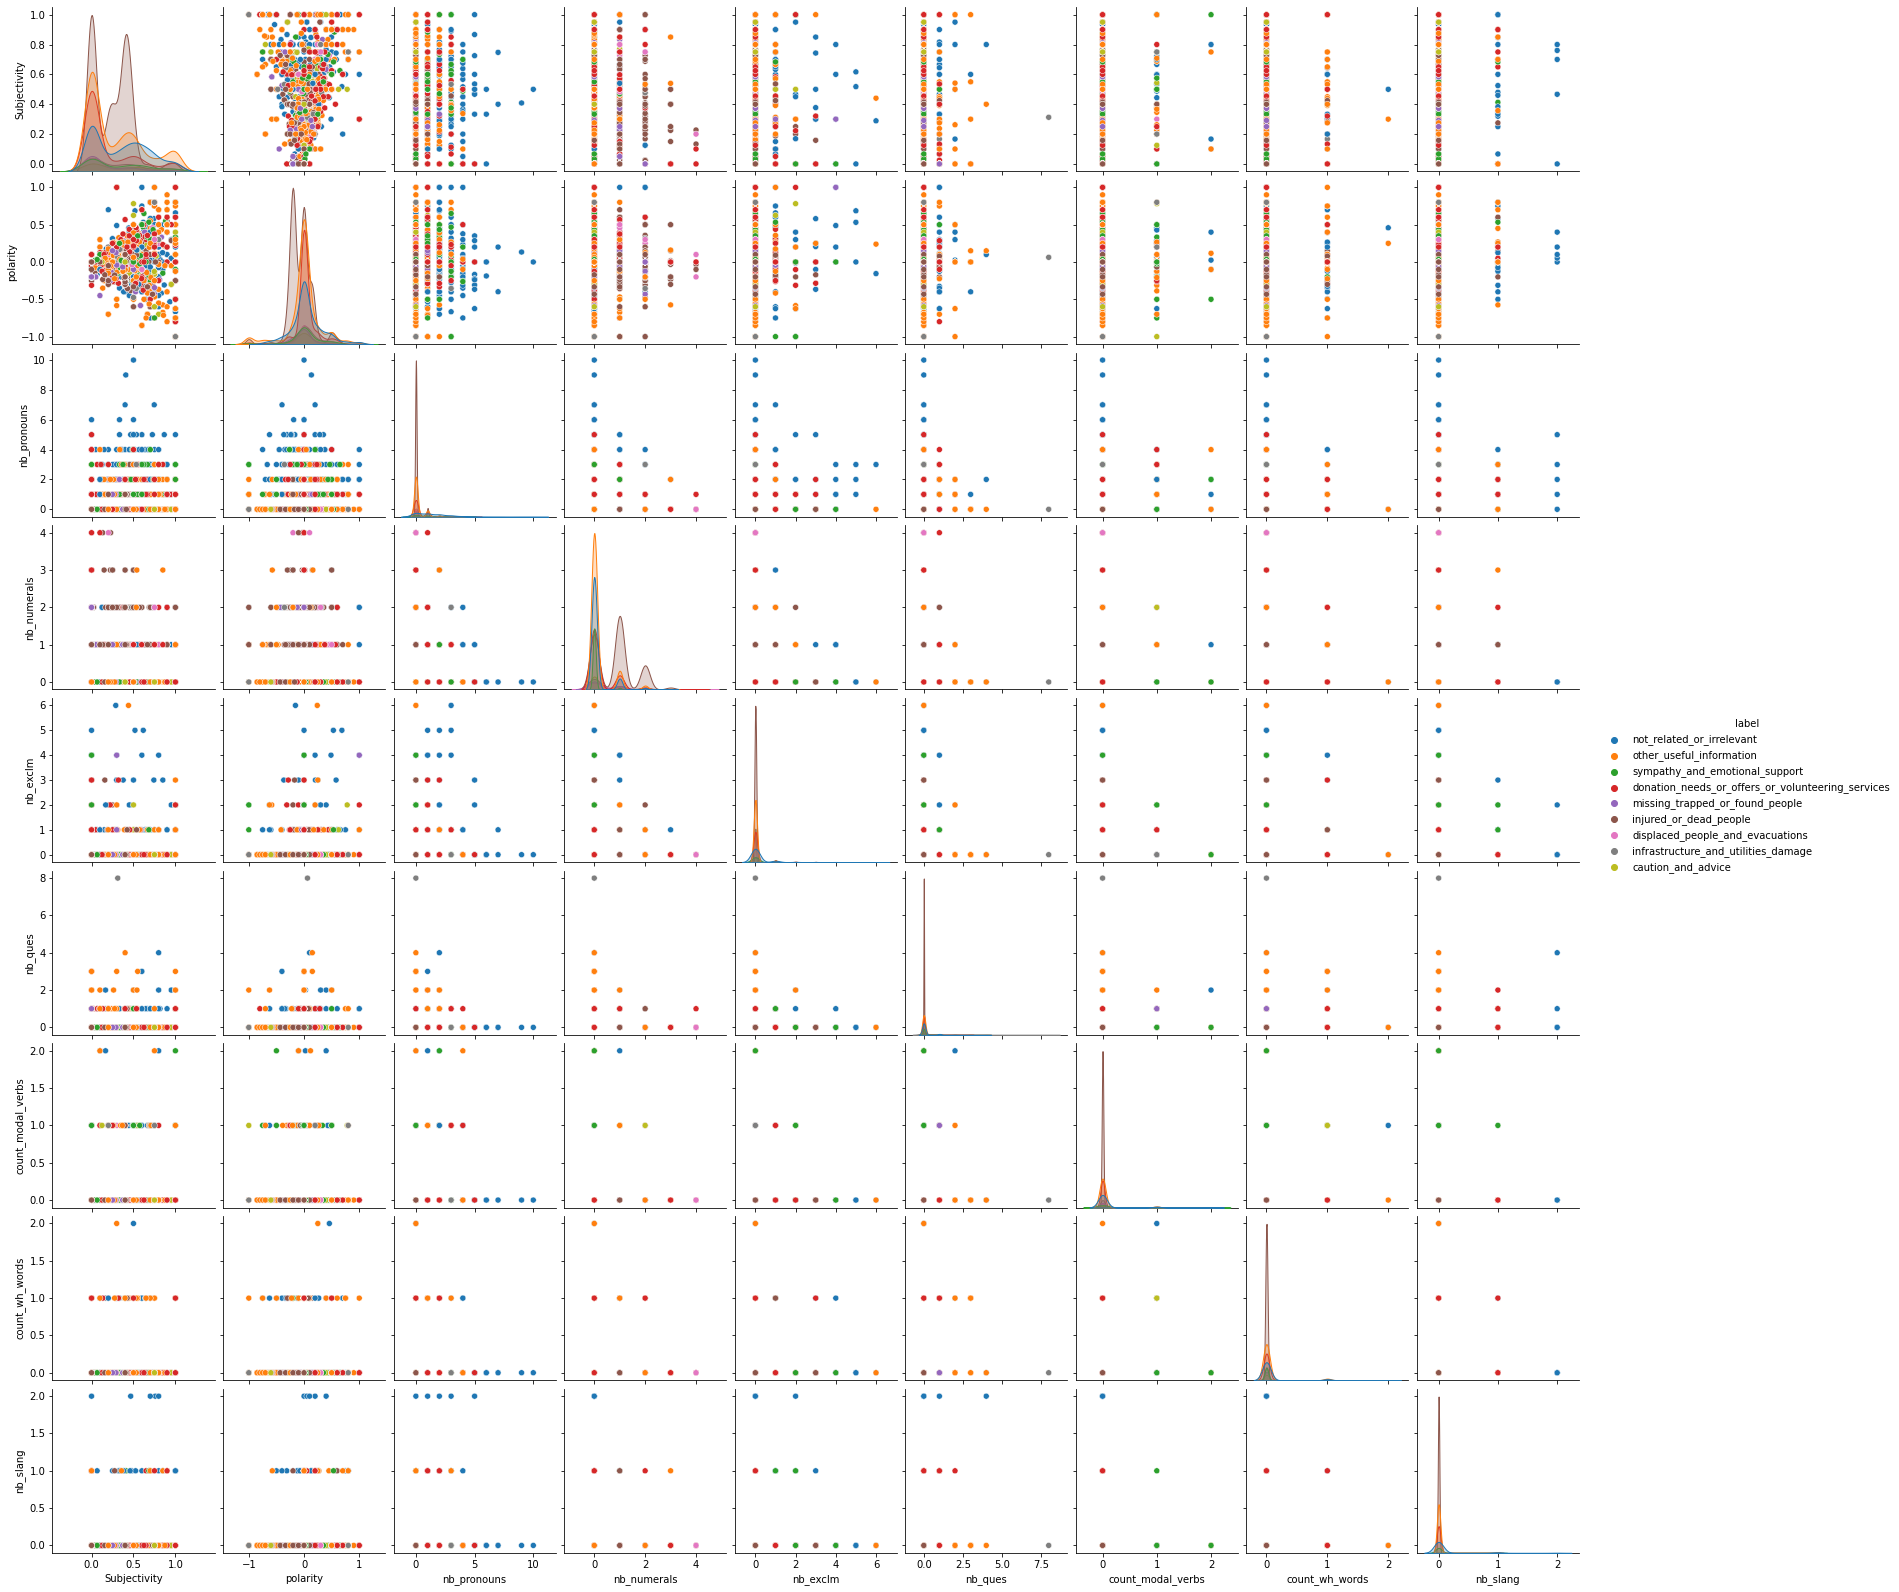

In [31]:
sns.pairplot(eq_df, hue='label', vars=['Subjectivity', 'polarity', 'nb_pronouns',
'nb_numerals', 'nb_exclm', 'nb_ques', 'count_modal_verbs',
'count_wh_words', 'nb_slang'])

In [32]:
svm_clf_rbf = svm.SVC(kernel='rbf', gamma=0.5, C=0.1)
X = eq_df.drop(['label', 'tweet_text', 'tokenized_text'], axis=1)
y = eq_df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=12)
svm_clf_rbf.fit(X_train, y_train)

rbf_pred = svm_clf_rbf.predict(X_test)

rbf_accuracy = accuracy_score(y_test, rbf_pred)
rbf_f1 = f1_score(y_test, rbf_pred, average='weighted')
print('Accuracy (RBF Kernel): ', "%.2f" % (rbf_accuracy*100))
print('F1 (RBF Kernel): ', "%.2f" % (rbf_f1*100))


Accuracy (RBF Kernel):  44.73
F1 (RBF Kernel):  36.70


In [33]:
svm_clf_poly = svm.SVC(kernel='poly', degree=0.5, C=1)
X = eq_df.drop(['label', 'tweet_text', 'tokenized_text'], axis=1)
y = eq_df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=111)
svm_clf_poly.fit(X_train, y_train)

poly_pred = svm_clf_rbf.predict(X_test)

poly_accuracy = accuracy_score(y_test, poly_pred)
poly_f1 = f1_score(y_test, poly_pred, average='weighted')
print('Accuracy (POLY Kernel): ', "%.2f" % (rbf_accuracy*100))
print('F1 (POLY Kernel): ', "%.2f" % (rbf_f1*100))

Accuracy (POLY Kernel):  44.73
F1 (POLY Kernel):  36.70


In [34]:
rf_clf = RandomForestClassifier(max_depth=7, random_state=0)
rf_clf.fit(X_train, y_train)

rf_pred = rf_clf.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred, average='weighted')

print('Accuracy (Random Forest): ', "%.2f" % (rf_accuracy*100))
print('F1 (Random Forest): ', "%.2f" % (rf_f1*100))

Accuracy (Random Forest):  50.55
F1 (Random Forest):  42.63


In [35]:
tokens = [nltk.word_tokenize(tweet) for tweet in eq_df['tweet_text'].values]

In [36]:
tokens

[['RT',
  '@',
  'lilid426',
  ':',
  'Everyone',
  'has',
  'all',
  'these',
  'intense',
  'relationship',
  'goals',
  'when',
  'my',
  'goal',
  'is',
  'just',
  'getting',
  'in',
  'a',
  'relationship',
  'and',
  'having',
  'someone',
  'put',
  'up',
  'wi…'],
 ['@',
  'kkfred12',
  '@',
  'StayDvpper',
  'oh',
  'yea',
  'I',
  'would',
  'like',
  'to',
  'that',
  'damn',
  'K',
  'and',
  'shove',
  'it',
  'up',
  'their',
  'ass',
  'sideways',
  'just',
  'do',
  "n't",
  'ever',
  'text',
  'back'],
 ['RT',
  '@',
  'fruitpopniall',
  ':',
  '``',
  '1D',
  'are',
  'about',
  'to',
  'split',
  'up',
  "''",
  '#',
  '1DToLiveOnForever',
  'http',
  ':',
  '//t.co/4nHQIq03Io'],
 ['@',
  'Harry_Styles',
  'You',
  'are',
  'my',
  '☀',
  'You',
  '💡',
  'up',
  'my',
  'whole',
  'day',
  'You',
  'are',
  'my',
  'entire',
  '🌎',
  'So',
  'please',
  'follow',
  'me',
  'I',
  '❤',
  'you',
  'so',
  'much',
  'x1'],
 ['RT',
  '@',
  'abonetti420',
  ':',
  'Swin

In [37]:
model = word2vec.Word2Vec(size=32, min_count=1, workers=4)

In [38]:
model.build_vocab(tokens)

In [40]:
model.train(tokens, total_examples=len(tokens), epochs=4000)

(218777356, 307804000)

In [41]:
def word_averaging(wv, words):
    all_words, mean = set(), []
    
    for word in words:
        if isinstance(word, np.ndarray):
            mean.append(word)
        elif word in wv.vocab:
            mean.append(wv.syn0[wv.vocab[word].index])
            all_words.add(wv.vocab[word].index)

    if not mean:
        logging.warning("cannot compute similarity with no input %s", words)
        # FIXME: remove these examples in pre-processing
        return np.zeros(wv.vector_size,)

    mean = gensim.matutils.unitvec(np.array(mean).mean(axis=0)).astype(np.float32)
    return mean

def  word_averaging_list(wv, text_list):
    return np.vstack([word_averaging(wv, post) for post in text_list])

In [42]:
def w2v_tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text, language='english'):
        for word in nltk.word_tokenize(sent, language='english'):
            if len(word) < 2:
                continue
            tokens.append(word)
    return tokens
    
train, test = train_test_split(eq_df, test_size=0.3, random_state = 42)

test_tokenized = test.apply(lambda r: w2v_tokenize_text(r['tweet_text']), axis=1).values
train_tokenized = train.apply(lambda r: w2v_tokenize_text(r['tweet_text']), axis=1).values

X_train_word_average = word_averaging_list(model.wv,train_tokenized)
X_test_word_average = word_averaging_list(model.wv,test_tokenized)

<ipython-input-41-7024ffee7301>:8: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
  mean.append(wv.syn0[wv.vocab[word].index])


In [43]:
logreg = LogisticRegression(n_jobs=1, C=1e5, solver='saga')
logreg = logreg.fit(X_train_word_average, train['label'])
y_pred = logreg.predict(X_test_word_average)
print('accuracy %s' % accuracy_score(y_pred, test.label))
print(classification_report(test.label, y_pred))

accuracy 0.6499535747446611
                                                   precision    recall  f1-score   support

                               caution_and_advice       0.00      0.00      0.00        20
                 displaced_people_and_evacuations       0.08      0.04      0.06        24
donation_needs_or_offers_or_volunteering_services       0.67      0.60      0.63       152
              infrastructure_and_utilities_damage       0.42      0.24      0.31        41
                           injured_or_dead_people       0.78      0.89      0.83       331
                  missing_trapped_or_found_people       0.33      0.20      0.25        30
                        not_related_or_irrelevant       0.80      0.86      0.83       180
                         other_useful_information       0.47      0.54      0.50       246
                   sympathy_and_emotional_support       0.48      0.21      0.29        53

                                         accuracy           

/Users/mahi/.conda/envs/crisis_nlp_IST700.ipynb/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [44]:
classifier = MLPClassifier(alpha = 0.7, max_iter=400) 
classifier.fit(X_train_word_average, train['label'])
 
df_results = pd.DataFrame(data=np.zeros(shape=(1,3)), columns = ['classifier', 'train_score', 'test_score'] )
train_score = classifier.score(X_train_word_average, train['label'])
test_score = classifier.score(X_test_word_average, test['label'])
 
#print(classifier.predict_proba(X_test_word_average))
#print(classifier.predict(X_test_word_average))
 
df_results.loc[1,'classifier'] = "MLP"
df_results.loc[1,'train_score'] = train_score
df_results.loc[1,'test_score'] = test_score
print(df_results)

  classifier  train_score  test_score
0          0     0.000000     0.00000
1        MLP     0.692675     0.65831


In [45]:
eq_df.to_csv('for_bert_eq_data_fl.csv')